<a href="https://colab.research.google.com/github/Anirudh-R-1201/Football_xG/blob/master/statsbomb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
import seaborn as sns
!pip install scikit-plot
import scikitplot as skplt

from sklearn import preprocessing, model_selection, metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [31]:
!pip install statsbomb
import statsbomb as sb

In [32]:
comps = sb.Competitions()
#json_data = comps.data
df = comps.get_dataframe()
df

,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
0,16,4,Europe,Champions League,male,2018/2019,2020-10-25T12:33:27.855343,2020-10-25T12:33:27.855343
1,16,1,Europe,Champions League,male,2017/2018,2020-07-29T05:00,2020-07-29T05:00
2,16,2,Europe,Champions League,male,2016/2017,2020-08-26T12:33:15.869622,2020-07-29T05:00
3,16,27,Europe,Champions League,male,2015/2016,2020-08-26T12:33:15.869622,2020-07-29T05:00
4,16,26,Europe,Champions League,male,2014/2015,2020-08-26T12:33:15.869622,2020-07-29T05:00
5,16,25,Europe,Champions League,male,2013/2014,2020-08-26T12:33:15.869622,2020-07-29T05:00
6,16,24,Europe,Champions League,male,2012/2013,2020-08-26T12:33:15.869622,2020-07-29T05:00
7,16,23,Europe,Champions League,male,2011/2012,2020-08-26T12:33:15.869622,2020-07-29T05:00
8,16,22,Europe,Champions League,male,2010/2011,2020-07-29T05:00,2020-07-29T05:00
9,16,21,Europe,Champions League,male,2009/2010,2020-07-29T05:00,2020-07-29T05:00


In [33]:
ucl_matches_1718 = sb.Matches(event_id='16', season_id='4').get_dataframe()
ucl_matches_1819 = sb.Matches(event_id='16', season_id='1').get_dataframe()
wc_matches = sb.Matches(event_id='43', season_id='3').get_dataframe()

matches = ucl_matches_1718.append(ucl_matches_1819).append(wc_matches)
matches.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,last_updated,metadata,match_week,competition_stage,stadium,referee
0,22912,2019-06-01,21:00:00.000,16,4,38,24,0,2,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",13,"{'id': 26, 'name': 'Final'}",NaN,NaN
0,18245,2018-05-26,20:45:00.000,16,1,220,24,3,1,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",7,"{'id': 26, 'name': 'Final'}","{'id': 4222, 'name': 'NSK Olimpijs'kyj', 'coun...","{'id': 727, 'name': 'M. Mažić'}"
0,7581,2018-07-01,20:00:00.000,43,3,785,776,1,1,available,2020-07-29T05:00,{'data_version': '1.0.2'},4,"{'id': 33, 'name': 'Round of 16'}","{'id': 4263, 'name': 'Stadion Nizhny Novgorod'...","{'id': 730, 'name': 'N. Pitana'}"
1,7549,2018-06-22,17:00:00.000,43,3,775,793,2,0,available,2020-07-29T05:00,{'data_version': '1.0.2'},2,"{'id': 10, 'name': 'Group Stage'}","{'id': 4257, 'name': 'Volgograd Arena', 'count...","{'id': 739, 'name': 'M. Conger'}"
2,7555,2018-06-24,20:00:00.000,43,3,789,769,0,3,available,2020-07-29T05:00,{'data_version': '1.0.2'},2,"{'id': 10, 'name': 'Group Stage'}","{'id': 4258, 'name': 'Kazan' Arena (Kazan')', ...","{'id': 740, 'name': 'C. Ramos'}"


In [34]:
match_list = matches['match_id'].tolist()

shots_df = pd.DataFrame()
for i in match_list:
    events = sb.Events(event_id='%s' % i)
    df = events.get_dataframe(event_type='shot')
    shots_df = shots_df.append(df)
    
shots_df.head()

,event_type,id,index,period,timestamp,minute,second,possession,possession_team,play_pattern,off_camera,team,player,position,duration,under_pressure,statsbomb_xg,key_pass_id,body_part,type,outcome,technique,first_time,follows_dribble,redirect,one_on_one,open_goal,deflected,start_location_x,start_location_y,end_location_x,end_location_y,end_location_z
0,shot,642e3db4-bfa4-4ed2-9a22-468e68bd6e0a,34,1,00:01:48.568,1,48,3,Liverpool,Other,None,Liverpool,Mohamed Salah,Right Wing,0.390909,None,0.760000,None,Left Foot,Penalty,Goal,Normal,None,None,None,None,None,None,108.2,40.1,120.0,42.5,0.9
1,shot,93adc671-0697-4ad0-8f30-6dea062f3b03,342,1,00:09:04.723,9,4,15,Tottenham Hotspur,Regular Play,None,Tottenham Hotspur,Moussa Sissoko,Right Defensive Midfield,1.237037,True,0.018768,None,Right Foot,Open Play,Off T,Normal,None,None,None,None,None,None,91.9,43.1,120.0,46.5,5.2
2,shot,e18a3a5e-b587-43f3-8dea-a25a14517c14,587,1,00:16:48.573,16,48,25,Liverpool,From Throw In,None,Liverpool,Trent Alexander-Arnold,Right Back,1.438182,None,0.011494,d2a6e1fe-6701-48ac-b03a-85c98d5ba906,Right Foot,Open Play,Off T,Normal,None,None,None,None,None,None,90.2,59.3,120.0,34.7,0.8
3,shot,2439947c-b340-48a3-a8fe-b4e217136ccd,758,1,00:20:31.085,20,31,35,Liverpool,From Keeper,None,Liverpool,Mohamed Salah,Right Wing,0.179142,None,0.037931,3f649523-5339-4ee3-8567-8d207fca2f14,Left Foot,Open Play,Blocked,Normal,None,None,None,None,None,None,95.2,47.2,99.7,46.2,NaN
4,shot,7c1825a8-ff22-4d87-9a58-b287f0f3104a,768,1,00:21:53.381,21,53,37,Liverpool,From Throw In,None,Liverpool,Mohamed Salah,Right Wing,1.154443,None,0.009835,98ff7789-fabe-4d12-bc36-f9ae758742b9,Left Foot,Open Play,Wayward,Normal,None,None,None,None,None,None,113.0,59.5,113.2,0.1,NaN


In [35]:
shots_df.shape

(1764, 33)

In [36]:
from google.colab import files
shots_df.to_csv('shots_df.csv') 
files.download('shots_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
print(len(shots_df), "shots ")
print("")

print("Columns :")
print(list(shots_df))
print("")

print("Unique Types :")
print(shots_df['type'].unique())
print("")

print("Unique Play Patterns :")
print(shots_df['play_pattern'].unique())

1764 shots 

Columns :
['event_type', 'id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession', 'possession_team', 'play_pattern', 'off_camera', 'team', 'player', 'position', 'duration', 'under_pressure', 'statsbomb_xg', 'key_pass_id', 'body_part', 'type', 'outcome', 'technique', 'first_time', 'follows_dribble', 'redirect', 'one_on_one', 'open_goal', 'deflected', 'start_location_x', 'start_location_y', 'end_location_x', 'end_location_y', 'end_location_z']

Unique Types :
['Penalty' 'Open Play' 'Free Kick']

Unique Play Patterns :
['Other' 'Regular Play' 'From Throw In' 'From Keeper' 'From Corner'
 'From Counter' 'From Free Kick' 'From Goal Kick' 'From Kick Off']


Conversion rate: 8.26%



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


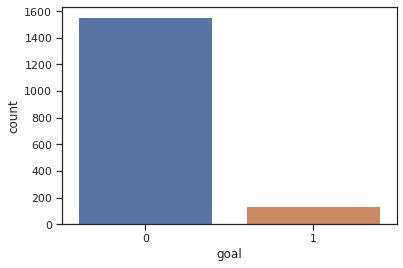

In [38]:
np_shots = shots_df[shots_df['type'] != 'Penalty']
np_shots['goal'] = np.where(np_shots['outcome'] == 'Goal', 1, 0)

attempts = len(np_shots)
goals = sum(np_shots['goal'])
misses = attempts - goals
conversion_rate = goals / attempts
print("Conversion rate:", "{0:.2f}%".format(conversion_rate*100))
print("")

sns.set(style="ticks", color_codes=True)
sns.countplot(x="goal", data=np_shots)

In [39]:
np_shots = np_shots.reset_index().drop('level_0', axis=1)

np_shots['assisted'] = np.where(np_shots['key_pass_id'].isna(), 0, 1)

np_shots['x_distance'] = 120 - np_shots['start_location_x']
np_shots['y_distance'] = abs(40 - np_shots['start_location_y'])
np_shots['distance'] = np.sqrt((np_shots['x_distance']**2 + np_shots['y_distance']**2))
np_shots['angle'] = np.degrees(np.arctan((np_shots['y_distance'] / np_shots['x_distance'])))

np_shots['body_part'] = np.where((np_shots['body_part'] == 'Right Foot')| (np_shots['body_part'] == 'Left Foot'), 'foot',
                                 np.where(np_shots['body_part'] == 'Head', 'head', 'other'))

In [40]:
np_shots.head()

,event_type,id,index,period,timestamp,minute,second,possession,possession_team,play_pattern,off_camera,team,player,position,duration,under_pressure,statsbomb_xg,key_pass_id,body_part,type,outcome,technique,first_time,follows_dribble,redirect,one_on_one,open_goal,deflected,start_location_x,start_location_y,end_location_x,end_location_y,end_location_z,goal,assisted,x_distance,y_distance,distance,angle
0,shot,93adc671-0697-4ad0-8f30-6dea062f3b03,342,1,00:09:04.723,9,4,15,Tottenham Hotspur,Regular Play,None,Tottenham Hotspur,Moussa Sissoko,Right Defensive Midfield,1.237037,True,0.018768,None,foot,Open Play,Off T,Normal,None,None,None,None,None,None,91.9,43.1,120.0,46.5,5.2,0,0,28.1,3.1,28.270479,6.295429
1,shot,e18a3a5e-b587-43f3-8dea-a25a14517c14,587,1,00:16:48.573,16,48,25,Liverpool,From Throw In,None,Liverpool,Trent Alexander-Arnold,Right Back,1.438182,None,0.011494,d2a6e1fe-6701-48ac-b03a-85c98d5ba906,foot,Open Play,Off T,Normal,None,None,None,None,None,None,90.2,59.3,120.0,34.7,0.8,0,1,29.8,19.3,35.503943,32.929153
2,shot,2439947c-b340-48a3-a8fe-b4e217136ccd,758,1,00:20:31.085,20,31,35,Liverpool,From Keeper,None,Liverpool,Mohamed Salah,Right Wing,0.179142,None,0.037931,3f649523-5339-4ee3-8567-8d207fca2f14,foot,Open Play,Blocked,Normal,None,None,None,None,None,None,95.2,47.2,99.7,46.2,NaN,0,1,24.8,7.2,25.824020,16.189206
3,shot,7c1825a8-ff22-4d87-9a58-b287f0f3104a,768,1,00:21:53.381,21,53,37,Liverpool,From Throw In,None,Liverpool,Mohamed Salah,Right Wing,1.154443,None,0.009835,98ff7789-fabe-4d12-bc36-f9ae758742b9,foot,Open Play,Wayward,Normal,None,None,None,None,None,None,113.0,59.5,113.2,0.1,NaN,0,1,7.0,19.5,20.718349,70.253163
4,shot,c678b67c-9658-4d7d-9a9b-d3db9a378829,1347,1,00:37:48.966,37,48,65,Liverpool,Regular Play,None,Liverpool,Andrew Robertson,Left Back,1.001382,None,0.014247,fee8184e-c893-4cb1-b070-dd3758b0c3af,foot,Open Play,Saved,Normal,None,None,None,None,None,None,98.4,20.4,118.3,37.9,2.4,0,1,21.6,19.6,29.167105,42.220833


In [41]:
np_shots = np_shots.fillna(0)

In [42]:
from google.colab import files
np_shots.to_csv('np_shots.csv') 
files.download('np_shots.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
feature_cols = ['play_pattern', 'under_pressure', 'body_part', 'technique', 'first_time',
                'follows_dribble', 'redirect', 'one_on_one', 'open_goal', 'deflected',
                'assisted', 'distance', 'angle']

features = np_shots[feature_cols]
labels = np_shots['goal']

features = features.fillna(0)
labels = labels.fillna(0)

In [44]:
cat_cols = ['play_pattern', 'under_pressure', 'body_part', 'technique', 'first_time',
                'follows_dribble', 'redirect', 'one_on_one', 'open_goal', 'deflected']

cat_features = features[cat_cols]
features = features.drop(cat_cols, axis=1)

le = preprocessing.LabelEncoder()
cat_features = cat_features.apply(le.fit_transform)
features = features.merge(cat_features, left_index=True, right_index=True)

In [45]:
features = features.sample(frac=1)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, shuffle=True, random_state=42)

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
print(X_train.shape)
print(X_test.shape)

(1271, 13)
(424, 13)


In [46]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)

Predicted XG of test set: 39
xG : 40.00
Actual goals test set: 34

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       390
           1       0.08      0.09      0.08        34

    accuracy                           0.84       424
   macro avg       0.50      0.50      0.50       424
weighted avg       0.85      0.84      0.85       424



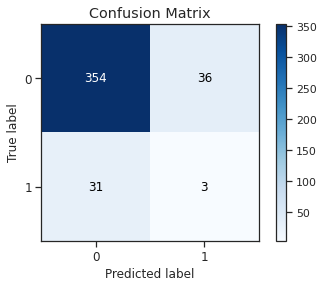

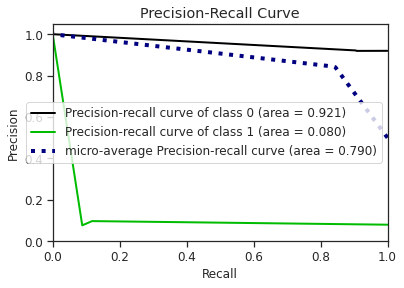

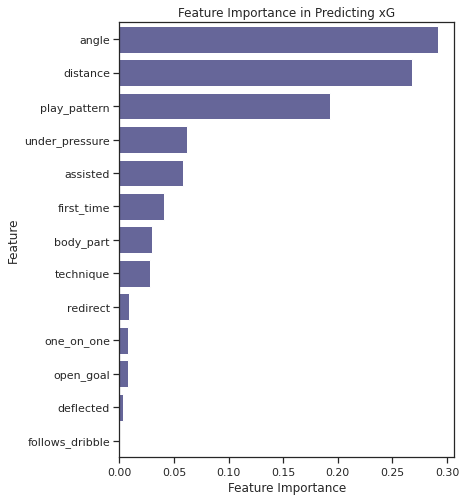

In [47]:
print("Predicted XG of test set:", sum(y_pred))
print("xG :", "{0:.2f}".format(sum(y_pred_prob[:,1])))
print("Actual goals test set:", sum(y_test))
print('')
print(metrics.classification_report(y_test, y_pred))

skplt.metrics.plot_confusion_matrix(y_test, y_pred)
skplt.metrics.plot_precision_recall(y_test, y_pred_prob)

importances = pd.DataFrame({'feature':features.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

f, ax = plt.subplots(figsize=(6, 8))
g = sns.barplot(x='importance', y='feature', data=importances, color="blue", saturation=.2, label="Total")
g.set(xlabel='Feature Importance', ylabel='Feature', title='Feature Importance in Predicting xG')
plt.show()

In [49]:
from imblearn.over_sampling import SMOTENC
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [50]:
cat_cols_ind = []
for key in cat_cols:
    ind = features.columns.get_loc(key)
    cat_cols_ind.append(ind)

smote_nc = SMOTENC(categorical_features=cat_cols_ind, random_state=42)
features_resampled, labels_resampled = smote_nc.fit_resample(features, labels)

X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(features_resampled, labels_resampled,test_size=0.25, shuffle=True, random_state=42)

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
X_train_re = scaler.fit_transform(X_train_re)
X_test_re = scaler.fit_transform(X_test_re)
print(X_train_re.shape)
print(X_test_re.shape)

(2332, 13)
(778, 13)


Predicted goals on test set: 292
xG : 294.50
Actual goals : 382

              precision    recall  f1-score   support

           0       0.67      0.82      0.73       396
           1       0.75      0.58      0.65       382

    accuracy                           0.70       778
   macro avg       0.71      0.70      0.69       778
weighted avg       0.71      0.70      0.69       778



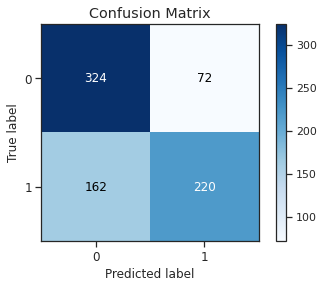

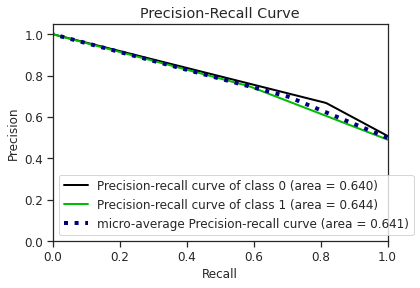

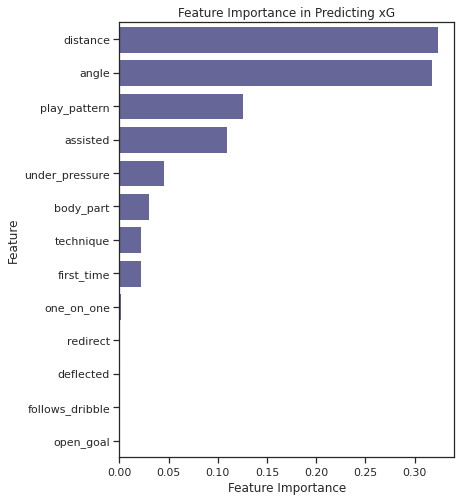

In [51]:
clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train_re, y_train_re)

y_pred_re = clf.predict(X_test_re)
y_pred_prob_re = clf.predict_proba(X_test_re)

print("Predicted goals on test set:", sum(y_pred_re))
print("xG :", "{0:.2f}".format(sum(y_pred_prob_re[:,1])))
print("Actual goals :", sum(y_test_re))
print('')
print(metrics.classification_report(y_test_re, y_pred_re))

skplt.metrics.plot_confusion_matrix(y_test_re, y_pred_re)

skplt.metrics.plot_precision_recall(y_test_re, y_pred_prob_re)

importances = pd.DataFrame({'feature':features.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

f, ax = plt.subplots(figsize=(6, 8))
g = sns.barplot(x='importance', y='feature', data=importances,color="blue", saturation=.2, label="Total")
g.set(xlabel='Feature Importance', ylabel='Feature', title='Feature Importance in Predicting xG')
plt.show()